In [3]:
#Importar librerías
%matplotlib inline

import cv2
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#Definir funciones de lectura de imágenes para mayor comodidad
def img_read(filename, mode = 'color'):
    if(mode == 'color'):   
        return cv2.cvtColor(cv2.imread(filename),cv2.COLOR_BGR2RGB)
    elif(mode=='grayscale' or mode=='greyscale' or mode == 'gray' or mode == 'grey'):
        return cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    else:
        return None

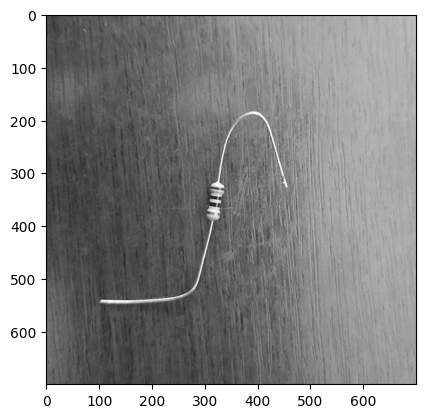

In [4]:
#Importar librerías
%matplotlib inline

from skimage.measure import label
import numpy as np
import matplotlib.pyplot as plt

from skimage.measure import label, regionprops
from skimage.transform import rotate

img = cv2.cvtColor(cv2.imread('res/carbR3.jpg'), cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap = "gray")

In [ ]:
roi = cv2.selectROI(img)
image_croped = img[int(roi[1]):int(roi[1]+roi[3]),int(roi[0]):int(roi[0]+roi[2])]
plt.imshow(image_croped)

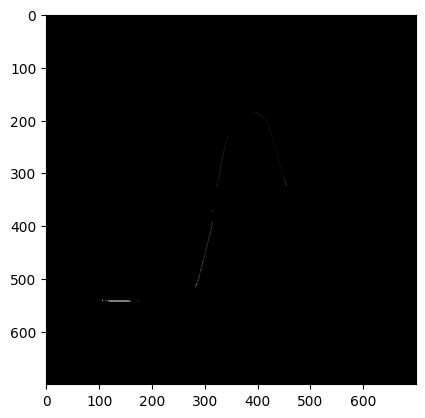

In [6]:

#Se realiza una umbralización(conversión de la imagen a dos valores, 0 y 255)
Umbral1,new=cv2.threshold(img,253,255, cv2.THRESH_BINARY)
plt.imshow(new)
label_img = label(new)
plt.imshow(label_img, cmap='gray')


El centroide es:  (334.1625441696113, 338.5424028268551)


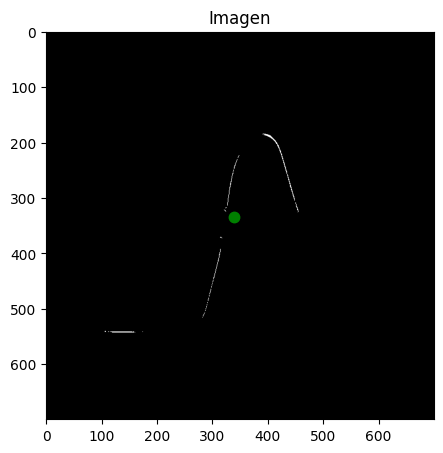

In [7]:

props = regionprops(new)

#Obtener las coordenadas x,y del centroide de la región etiquetada
y0, x0 = props[0].centroid
print("El centroide es: ", props[0].centroid)

#Imprimir la imagen con el centroide pintado de verde
fig, ax = plt.subplots(1,1, figsize=(5, 6))
ax.set_title('Imagen')
ax.plot(x0, y0, '.g', markersize=15)
ax.imshow(new, cmap='gray')

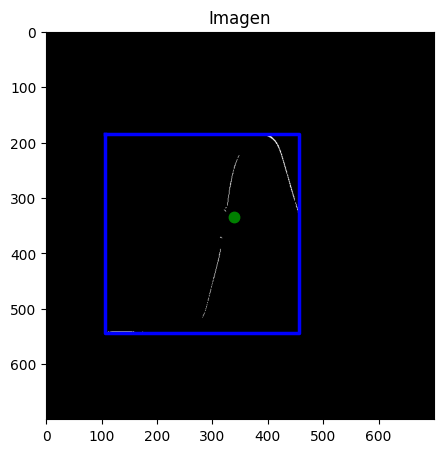

In [8]:


#Crear imagen de ceros 600x600
image = np.zeros((600, 600))

#Utilizar la función bbox para buscar los 4 puntos que conforman el rectángulo más pequeño
#que puede contener la región etiquetada
minr, minc, maxr, maxc = props[0].bbox
bx = (minc, maxc, maxc, minc, minc)
by = (minr, minr, maxr, maxr, minr)


#Mostrar la región que corresponde al rectángulo que encierra la región etiquetada
fig, ax = plt.subplots(1,1, figsize=(5, 6))
ax.set_title('Imagen')
ax.plot(x0, y0, '.g', markersize=15)
ax.plot(bx, by, '-b', linewidth=2.5)
ax.imshow(new, cmap='gray')

El centroide es:  (349.76802096985585, 326.870249017038)


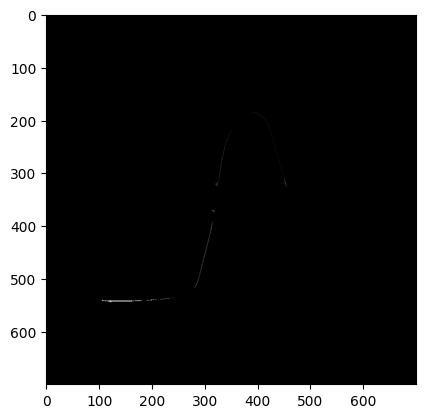

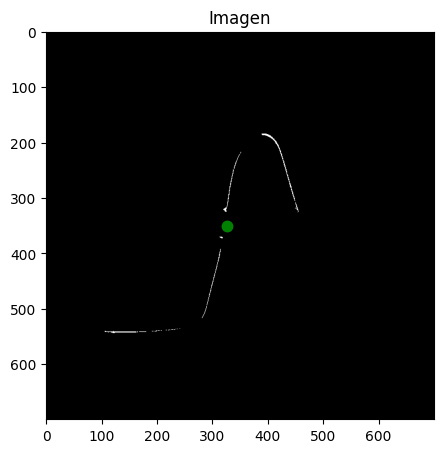

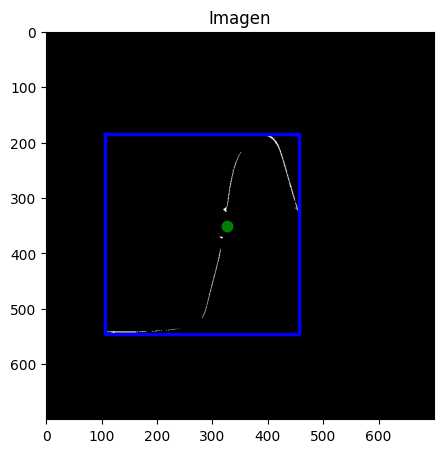

In [10]:
#Importar librerías
%matplotlib inline

from skimage.measure import label
import numpy as np
import matplotlib.pyplot as plt

from skimage.measure import label, regionprops
from skimage.transform import rotate

img = cv2.cvtColor(cv2.imread('res/carbR3.jpg'), cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap = "gray")

#Se realiza una umbralización(conversión de la imagen a dos valores, 0 y 255)
Umbral1,new=cv2.threshold(img,250,255, cv2.THRESH_BINARY)
plt.imshow(new)
label_img = label(new)
plt.imshow(label_img, cmap='gray')
props = regionprops(new)

#Obtener las coordenadas x,y del centroide de la región etiquetada
y0, x0 = props[0].centroid
print("El centroide es: ", props[0].centroid)

#Imprimir la imagen con el centroide pintado de verde
fig, ax = plt.subplots(1,1, figsize=(5, 6))
ax.set_title('Imagen')
ax.plot(x0, y0, '.g', markersize=15)
ax.imshow(new, cmap='gray')

#Crear imagen de ceros 600x600
image = np.zeros((600, 600))

#Utilizar la función bbox para buscar los 4 puntos que conforman el rectángulo más pequeño
#que puede contener la región etiquetada
minr, minc, maxr, maxc = props[0].bbox
bx = (minc, maxc, maxc, minc, minc)
by = (minr, minr, maxr, maxr, minr)


#Mostrar la región que corresponde al rectángulo que encierra la región etiquetada
fig, ax = plt.subplots(1,1, figsize=(5, 6))
ax.set_title('Imagen')
ax.plot(x0, y0, '.g', markersize=15)
ax.plot(bx, by, '-b', linewidth=2.5)
ax.imshow(new, cmap='gray')

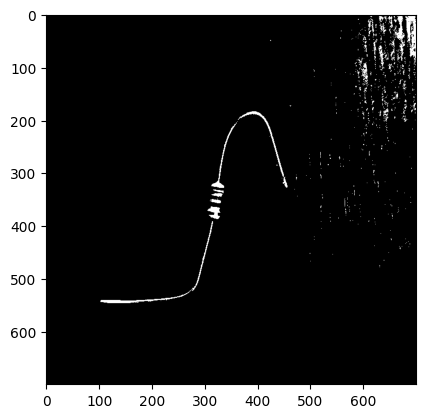

In [14]:
img = cv2.cvtColor(cv2.imread('res/carbR3.jpg'), cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


#Se realiza una umbralización(conversión de la imagen a dos valores, 0 y 255)
Umbral1,new=cv2.threshold(img,180,255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(new, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE )

plt.imshow(cv2.drawContours(new, contours, 100, (0,255,0), 54),cmap='gray')



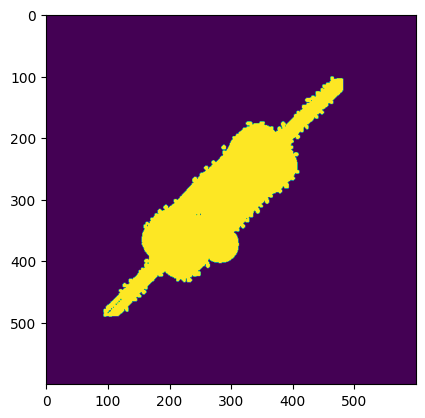

In [73]:
img = cv2.imread('res/oxi1.jpg')
#gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
R=cv2.bitwise_not(new)
suavizado = cv2.GaussianBlur(R, (5, 5), 0)
umbral = cv2.adaptiveThreshold(suavizado, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
contorno, _ = cv2.findContours(umbral, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(R, contorno, -1, (0, 0, 255), 2)
plt.imshow(R)
plt.show()
#rect = cv2.minAreaRect(contours[0])
#box = cv2.boxPoints(rect)
#box = np.int0(box)
#cv2.drawContours(img,[box],0,(0,0,255),2)
#plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


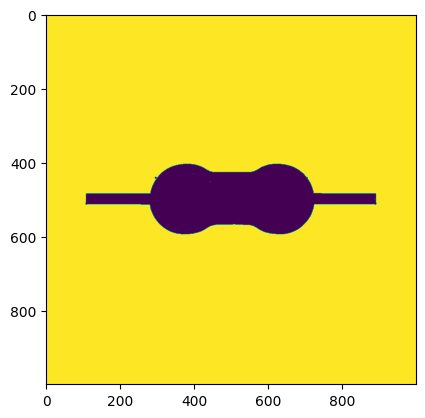

In [87]:
img = cv2.cvtColor(cv2.imread('res/uno.jpg'), cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap = "gray")
#Se realiza una umbralización(conversión de la imagen a dos valores, 0 y 255)
Umbral1,new=cv2.threshold(img,240,255, cv2.THRESH_BINARY)
suavizado = cv2.GaussianBlur(new, (5, 5), 0)
umbral = cv2.adaptiveThreshold(suavizado, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
contorno, _ = cv2.findContours(umbral, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(new, contorno, -1, (0, 0, 255), 2)
plt.imshow(new)
plt.show()

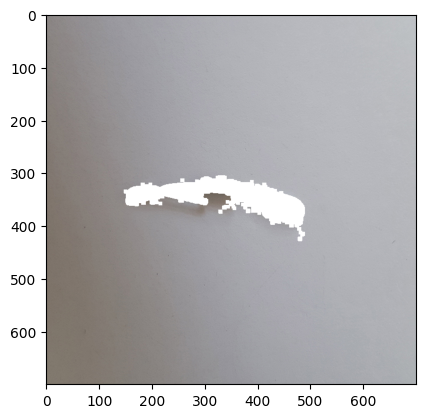

In [29]:
img = cv2.imread('res/carbR1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
suavizado = cv2.GaussianBlur(gray, (5, 5), 0)
umbral = cv2.adaptiveThreshold(suavizado, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
dilated = cv2.dilate(umbral, np.ones((7, 7), np.uint8), iterations=1)
contorno, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contorno = sorted(contorno, key=cv2.contourArea, reverse=True)[:1]
cv2.drawContours(img, contorno, -1,  (255, 255, 255), cv2.FILLED)
rect = cv2.minAreaRect(contorno[0])
box = cv2.boxPoints(rect)
box = np.int0(box)
#cv2.drawContours(img,[box],0,(0,0,255),2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

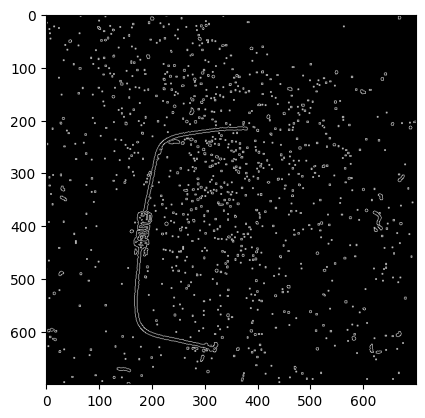

In [20]:
edges1 = cv2.Canny(img,150,200)
plt.imshow(edges1,cmap='gray')